<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Impostazione dei semi casuali per riproducibilità
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Funzione per costruire il classificatore MNIST

def build_classifier():
    model = models.Sequential()

     # Definizione dello strato di input
    model.add(layers.Input(shape=(28, 28, 1)))

    # Strato convoluzionale 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Strato convoluzionale 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Strato convoluzionale 3
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten prima degli strati densi
    model.add(layers.Flatten())

    # Strato denso con 64 neuroni
    model.add(layers.Dense(64, activation='relu'))

    # Strato di output con 10 neuroni (una per ogni classe) con attivazione softmax
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', # This line was incorrectly indented
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [4]:
# Carica e prepara i dati MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizza i dati come nel codice originale
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_test = (x_test.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Crea e addestra il classificatore
MNIST_classifier = build_classifier()

history = MNIST_classifier.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7717 - loss: 0.7888 - val_accuracy: 0.9712 - val_loss: 0.0964
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9693 - loss: 0.0973 - val_accuracy: 0.9812 - val_loss: 0.0630
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9801 - loss: 0.0620 - val_accuracy: 0.9854 - val_loss: 0.0526
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9852 - loss: 0.0453 - val_accuracy: 0.9861 - val_loss: 0.0497
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9873 - val_loss: 0.0449
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9875 - val_loss: 0.0480
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9877 - val_loss: 0.0448
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9935 - loss: 0.0222 - val_accuracy: 

Test accuracy: 0.9906


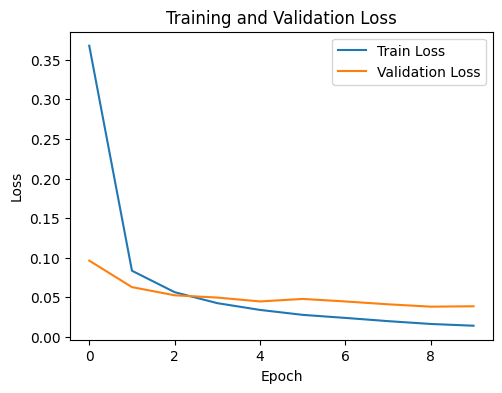

In [6]:
# Visualizza l'andamento dell'addestramento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Valuta il classificatore sul set di test
test_loss, test_acc = MNIST_classifier.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


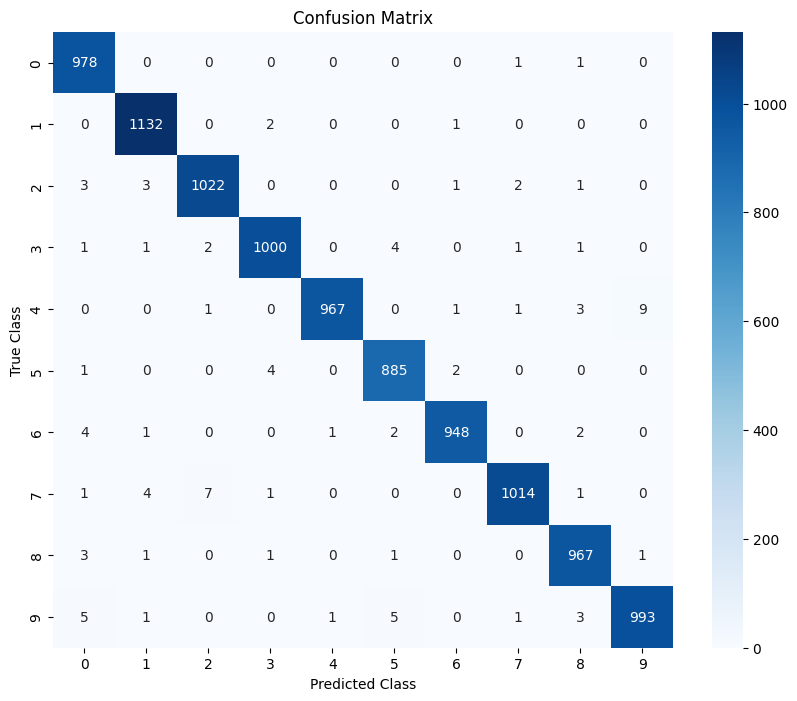

In [7]:
# Crea la matrice di confusione
y_pred = MNIST_classifier.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizza la matrice di confusione
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


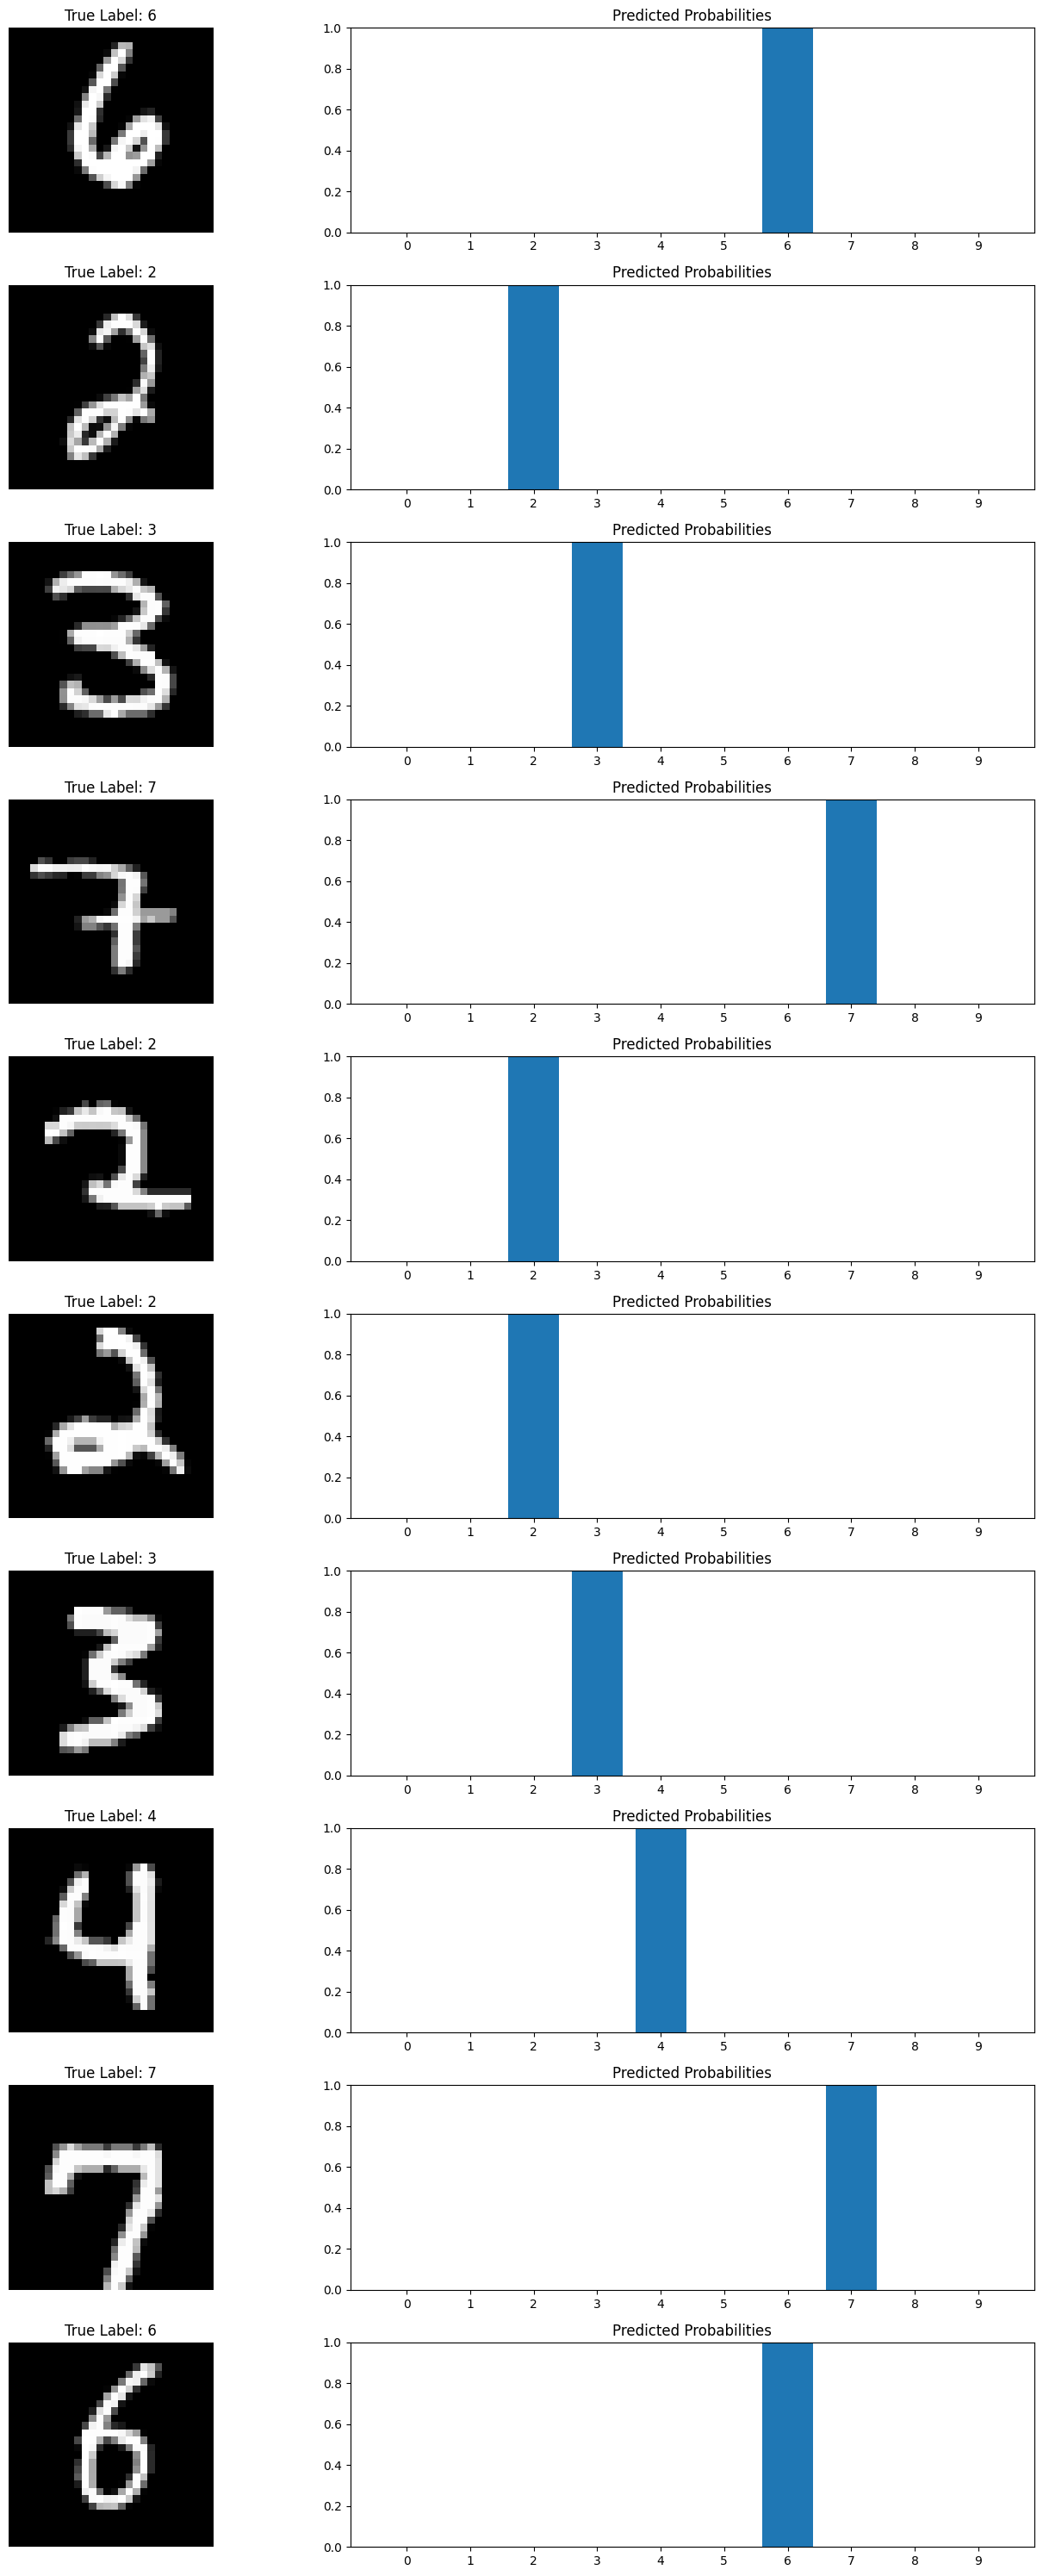

In [8]:
# Visualizza alcuni esempi con le probabilità predette

num_examples = 10
random_indices = np.random.choice(len(x_test), num_examples, replace=False)

plt.figure(figsize=(15, 3*num_examples))
for i, idx in enumerate(random_indices):
    plt.subplot(num_examples, 2, 2*i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {y_test[idx]}")
    plt.axis('off')

    plt.subplot(num_examples, 2, 2*i+2)
    probs = MNIST_classifier.predict(x_test[idx].reshape(1, 28, 28, 1))[0]
    plt.bar(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], probs)
    plt.title(f"Predicted Probabilities")
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [9]:
# Impostazione parametri globali

LATENT_DIM = 100 # Dimensione del vettore di rumore latente da usare come input al generatore
NUM_EPOCHS = 100 # Numero di epoche di allenamento del GAN
BATCH_SIZE = 64 # Dimensione del batch per l'allenamento
NUM_SAMPLES = 5000 # Numero di esempi da selezionare casualmente dal dataset MNIST (evitiamo di usare l'intero dataset per risparmiare tempo)

Dimensioni del dataset di allenamento: (5000, 28, 28, 1)


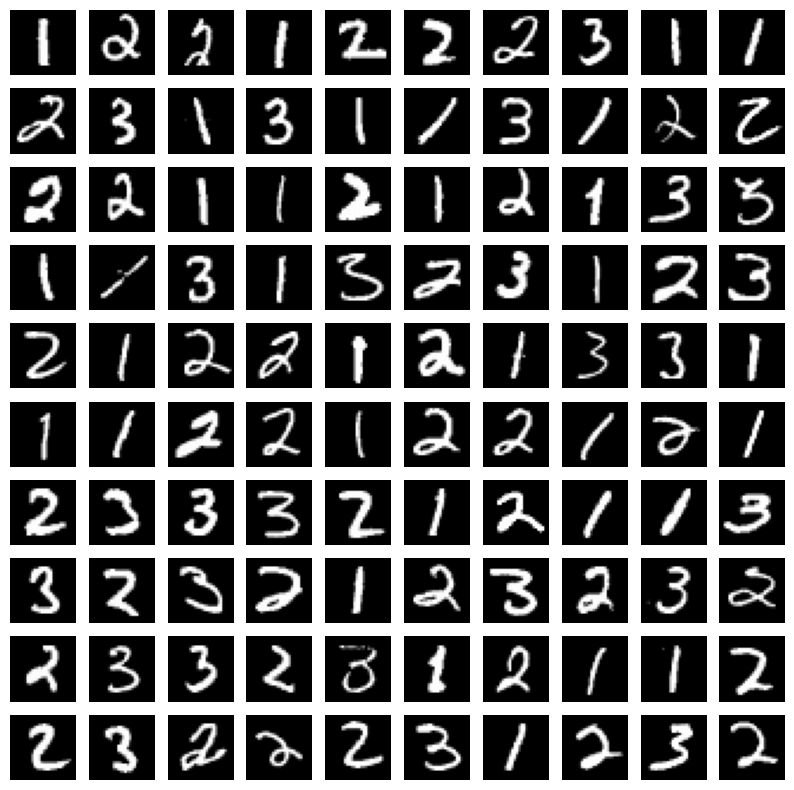

In [10]:

# # # Funzioni di utilità per la preparazione dei dati e la visualizzazione

def carica_e_prepara_dati():

    #Carica il dataset MNIST, seleziona solo le cifre 1, 2 e 3,
    #normalizza le immagini e seleziona un sottoinsieme casuale.

    mnist = keras.datasets.mnist
    (x_train, y_train), (_, _) = mnist.load_data()

    # Seleziona solo le cifre 1, 2 e 3
    mask = np.isin(y_train, [1, 2, 3])
    x_train, y_train = x_train[mask], y_train[mask]

    # Normalizza le immagini nell'intervallo [-1, 1]
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5
    x_train = np.expand_dims(x_train, axis=-1)

    # Seleziona un sottoinsieme casuale di esempi
    indici_casuali = np.random.choice(x_train.shape[0], NUM_SAMPLES, replace=False)
    x_train, y_train = x_train[indici_casuali], y_train[indici_casuali]

    return x_train, y_train

def visualizza_esempi(x_train, num_esempi=10):
    """
    Visualizza un numero specificato di esempi casuali dal dataset.
    """
    num_righe = int(np.sqrt(num_esempi))
    num_colonne = int(np.ceil(num_esempi / num_righe))

    plt.figure(figsize=(num_colonne, num_righe))
    for i in range(num_esempi):
        plt.subplot(num_righe, num_colonne, i+1)
        plt.imshow(x_train[np.random.randint(0, x_train.shape[0])].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()


# Carica e prepara i dati
x_train, y_train = carica_e_prepara_dati()

print("Dimensioni del dataset di allenamento:", x_train.shape)

visualizza_esempi(x_train, num_esempi=100)

In [11]:
# # # definizione del generatore e il discriminatore del GAN e le funzioni di perdita

def crea_generatore(LATENT_DIM):
    """
    Crea e restituisce il modello del generatore.
    """
    model = keras.Sequential()

    # Definizione dello strato di input
    model.add(layers.Input(shape=(LATENT_DIM,)))

    # Strato 1: Dense Layer per trasformare il rumore in un vettore più grande
    model.add(layers.Dense(7 * 7 * 256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Reshape per prepararsi alla convoluzione trasposta
    model.add(layers.Reshape((7, 7, 256)))  # Da vettore a immagine 7x7 con 256 canali

    # Strato 2: Convoluzione trasposta per upscaling
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Strato 3: Convoluzione trasposta con upscaling
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Strato 4: Convoluzione trasposta per generare l'immagine finale (28x28x1)
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

def crea_discriminatore(input_shape=(28, 28, 1)):
    """
    Crea e restituisce il modello del discriminatore.
    """
    model = keras.Sequential()

    # Definizione dello strato di input
    model.add(layers.Input(shape=(input_shape)))

    # Strato 1: Convoluzione per estrarre feature
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.Dropout(0.3))

    # Strato 2: Convoluzione per ridurre ulteriormente la dimensionalità
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.Dropout(0.3))

    # Strato 3: Flattening per passare ai livelli completamente connessi
    model.add(layers.Flatten())

    # Strato denso completamente connesso per il classificatore binario
    model.add(layers.Dense(1, activation='linear'))  # Output tra 0 e 1 (falso vs reale)

    return model

def loss_discriminatore(output_reale, output_falso):
    """
    Calcola la loss del discriminatore.
    Quanto bene il discriminatore riesce a distinguere le immagini reali da quelle generate?
    Questa loss cerca di massimizzare la probabilità di classificare correttamente sia le immagini reali che quelle generate.
    In altre parole, cerca di minimizzare la probabilità che il discriminatore classifichi le immagini reali come false e le immagini generate come vere.
    """
    cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)
    loss_reale = cross_entropy(tf.ones_like(output_reale), output_reale)
    loss_falso = cross_entropy(tf.zeros_like(output_falso), output_falso)
    return loss_reale + loss_falso

def loss_generatore(output_falso):
    """
    Calcola la loss del generatore.
    Quanto bene il generatore riesce a ingannare il discriminatore?
    Questa loss cerca di minimizzare la probabilità che il discriminatore classifichi correttamente le immagini generate come false.
    In altre parole, cerca di massimizzare la probabilità che il discriminatore classifichi le immagini generate come vere.
    """
    cross_entropy = keras.losses.BinaryCrossentropy(from_logits=True)
    return cross_entropy(tf.ones_like(output_falso), output_falso)


# Creazione dei modelli e visualizzazione dettagli tramite la funzione .summary() di Keras
generatore = crea_generatore(LATENT_DIM)
generatore.summary()
discriminatore = crea_discriminatore()
discriminatore.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
@tf.function # Questo comando vuol dire che la funzione verrà eseguita in modalità grafica per prestazioni migliori durante l'allenamento del GAN (una peculiarità di TensorFlow)
def step_allenamento(immagini, generatore, discriminatore, ottimizzatore_gen, ottimizzatore_disc):
    """
    Esegue un singolo step di allenamento per il GAN.
    Questa funzione alterna l'ottimizzazione del generatore e del discriminatore, calcolando le relative loss.
    L'allenamento del generatore cerca di massimizzare la probabilità che il discriminatore classifichi le immagini generate come vere.
    L'allenamento del discriminatore cerca di massimizzare la probabilità di classificare correttamente sia le immagini reali che quelle generate.
    """
    rumore = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        immagini_generate = generatore(rumore, training=True)

        output_reale = discriminatore(immagini, training=True)
        output_falso = discriminatore(immagini_generate, training=True)

        loss_gen = loss_generatore(output_falso)
        loss_disc = loss_discriminatore(output_reale, output_falso)

    gradienti_generatore = gen_tape.gradient(loss_gen, generatore.trainable_variables)
    gradienti_discriminatore = disc_tape.gradient(loss_disc, discriminatore.trainable_variables)

    # Ensure optimizers are built before applying gradients
    ottimizzatore_gen.build(generatore.trainable_variables)
    ottimizzatore_disc.build(discriminatore.trainable_variables)

    ottimizzatore_gen.apply_gradients(zip(gradienti_generatore, generatore.trainable_variables))
    ottimizzatore_disc.apply_gradients(zip(gradienti_discriminatore, discriminatore.trainable_variables))

    return loss_gen, loss_disc

def salva_immagini_generate(immagini, epoca, cartella='immagini_generate'):
    """
    Salva le immagini generate in una griglia.
    Questo serve per visualizzare come cambiano le immagini generate durante l'allenamento.
    Se le immagini vengono generate a partire dallo stesso rumore, dovrebbe vedersi un progressivo miglioramento nella qualità delle immagini durante l'allenamento.
    """
    import os

    fig, axs = plt.subplots(8, 8, figsize=(8, 8))
    axs = axs.flatten()

    for img, ax in zip(immagini, axs):
        ax.imshow((img.numpy() * 127.5 + 127.5).astype(np.uint8), cmap='gray')
        ax.axis('off')

    if not os.path.exists(cartella):
        os.makedirs(cartella)

    plt.savefig(f"{cartella}/epoca_{epoca+1:03d}.png")
    plt.close()

def valuta_frazione_immagini_confidenti(generatore, classificatore, confidenza = 0.95, num_immagini=100):
    """
    Valuta la frazione di immagini generate classificate come 1, 2, o 3 con alta confidenza.
    Serve a valutare quanto bene il generatore è in grado di generare immagini simili a quelle del dataset.
    In questo modo possiamo vedere se il generatore è in grado di generare immagini simili a quelle del dataset di allenamento.
    Si potrebbe fare visulmente, ma questa funzione fornisce una misura quantitativa.
    Fatto questo, useremo anche LLMs con visione per valutare la qualità delle immagini generate in modo indipendente.
    """

   # Step 1: Genera il rumore casuale per il generatore
    rumore = tf.random.normal([num_immagini, LATENT_DIM])

    # Step 2: Usa il generatore per creare immagini
    immagini_generate = generatore(rumore, training=False)  # Generazione in modalità non training

    # Step 3: Classifica le immagini generate con il classificatore MNIST pre-addestrato
    probabilita_classi = classificatore.predict(immagini_generate)  # Predizione delle probabilità per ogni immagine

    # Step 4: Contatore per le immagini classificate con alta confidenza come 1, 2 o 3
    conteggio_confidenti = 0

    # Step 5: Itera su ciascuna classificazione e verifica la confidenza
    for probabilita in probabilita_classi:
        # Verifica se la probabilità per le classi 1, 2 o 3 è maggiore della soglia di confidenza
        if (probabilita[1] > confidenza) or (probabilita[2] > confidenza) or (probabilita[3] > confidenza):
            conteggio_confidenti += 1

    # Step 6: Calcola la frazione di immagini classificate come 1, 2 o 3 con alta confidenza
    frazione_confidenti = conteggio_confidenti / num_immagini

    return frazione_confidenti

In [13]:
def salva_immagini_random_generate(generatore, num_esempi=100, epoca=0, latent_dim=32):
    """
    Visualizza esempi di immagini generate.
    """
    rumore = tf.random.normal([num_esempi, latent_dim])
    immagini_generate = generatore(rumore, training=False).numpy()

    num_righe = int(np.sqrt(num_esempi))
    num_colonne = int(np.ceil(num_esempi / num_righe))

    plt.figure(figsize=(num_colonne, num_righe))
    for i in range(num_esempi):
        plt.subplot(num_righe, num_colonne, i+1)
        plt.imshow(immagini_generate[i, :, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')

    # Create the directory if it doesn't exist
    import os
    if not os.path.exists("immagini_casuali"):
        os.makedirs("immagini_casuali")

    plt.savefig(f"immagini_casuali/epoca_{epoca+1:03d}.png")
    plt.close()


def allena_gan(generatore, discriminatore, dataset, classificatore):
    """
    Allena il GAN e restituisce le metriche di allenamento.
    """

 # Learning rate per gli ottimizzatori del generatore e del discriminatore (come nell'articolo originale di DCGAN)
    ottimizzatore_gen = keras.optimizers.Adam(1e-4)
    ottimizzatore_disc = keras.optimizers.Adam(1e-4)


    # definire le liste per memorizzare le loss e la frazione di immagini confidenti
    losses_gen, losses_disc = [], []
    conteggio_immagini_confidenti = []

    # Genera rumore fisso per visualizzare le immagini generate durante l'allenamento
    # Lo facciamo per 64 immagini
    rumore_fisso = tf.random.normal([64, LATENT_DIM])

    # comincia l'allenamento, ciclo sul numero di epoche
    for epoca in range(NUM_EPOCHS):

        losses_gen_batch, losses_disc_batch = [], []

        # ciclo sul dataset in batch all'interno di ogni epoca
        for batch in dataset:
            loss_gen, loss_disc = step_allenamento(batch, generatore, discriminatore,
                                                   ottimizzatore_gen, ottimizzatore_disc)
            losses_gen_batch.append(loss_gen)
            losses_disc_batch.append(loss_disc)

        # salviamo le loss medie per epoca, mediando su tutti i batch
        losses_gen.append(np.mean(losses_gen_batch))
        losses_disc.append(np.mean(losses_disc_batch))

        # Genera e salva immagini usando rumore fisso
        immagini_generate = generatore(rumore_fisso, training=False)
        salva_immagini_generate(immagini_generate, epoca)

        # Valuta la frazione di immagini confidenti
        conteggio_confidenti = valuta_frazione_immagini_confidenti(generatore, classificatore)
        conteggio_immagini_confidenti.append(conteggio_confidenti)

        salva_immagini_random_generate(generatore, num_esempi=100, epoca=epoca, latent_dim=LATENT_DIM)

        print(f"Epoca {epoca+1}/{NUM_EPOCHS}, Loss_Gen: {losses_gen[-1]:.4f}, "
              f"Loss_Disc: {losses_disc[-1]:.4f}, Immagini confidenti: {conteggio_confidenti:.2f}")

    return losses_gen, losses_disc, conteggio_immagini_confidenti


# Crea il dataset in formato TensorFlow, diviso in batch e shufflato casualmente
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)

# Allena il GAN e salva le metriche di allenamento e la frazione di immagini confidenti per ogni epoca, da visualizzare successivamente
losses_gen, losses_disc, conteggio_immagini_confidenti = allena_gan(generatore, discriminatore, dataset, classificatore= MNIST_classifier)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Epoca 1/100, Loss_Gen: 0.6800, Loss_Disc: 0.9898, Immagini confidenti: 0.00
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 2/100, Loss_Gen: 0.8568, Loss_Disc: 0.9861, Immagini confidenti: 0.00
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 3/100, Loss_Gen: 0.7555, Loss_Disc: 1.2349, Immagini confidenti: 0.00
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 4/100, Loss_Gen: 0.8480, Loss_Disc: 1.1715, Immagini confidenti: 0.00
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 5/100, Loss_Gen: 0.8702, Loss_Disc: 1.0905, Immagini confidenti: 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 6/100, Loss_Gen: 0.9619, Loss_Disc: 1.1143, Immagini confidenti: 0.32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 7/100, Loss_Gen: 0.8393, Loss_Disc: 1.2637, Immagini confidenti: 0.05
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 8/100, Loss_Gen: 0.7193, Loss_Disc: 1.4598, Immagini confidenti: 0.52
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoca 9/100, Loss_Gen: 0.7418, Loss_Disc: 1.3590,

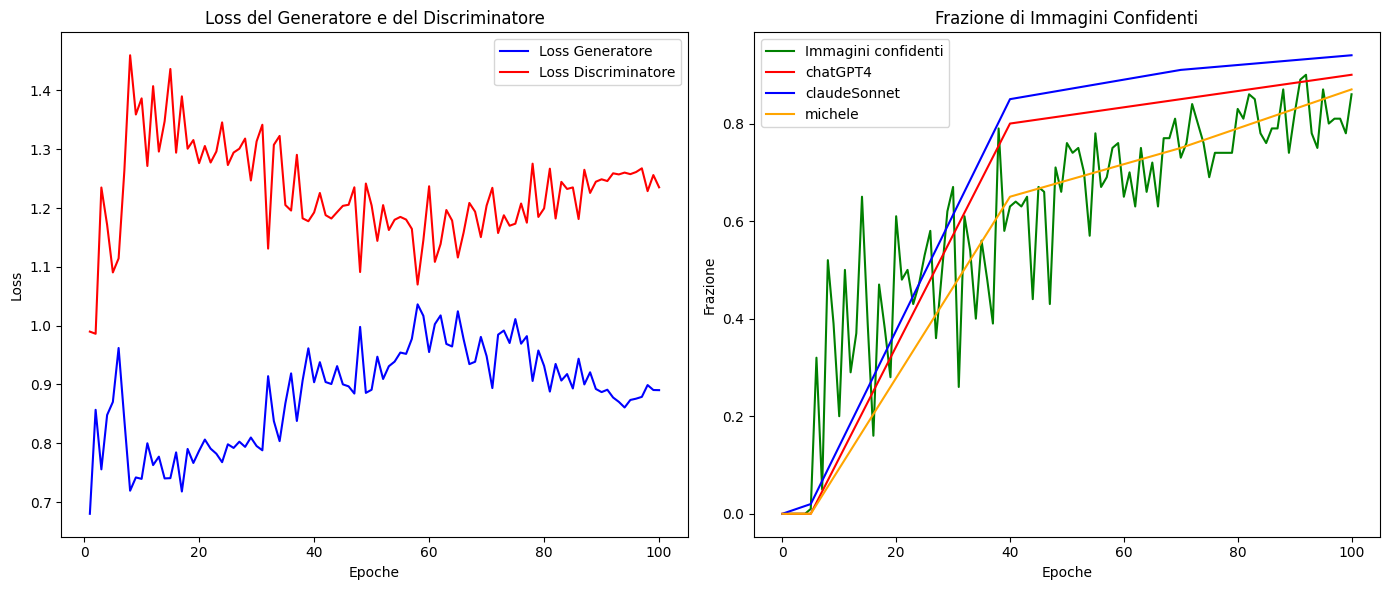

In [20]:
def visualizza_metriche(losses_gen, losses_disc, conteggio_immagini_confidenti):
    """
    Visualizza le metriche di allenamento del GAN.
    """
    epoche = np.arange(1, len(losses_gen)+1)

    array_epoche = np.array([0, 5, 40, 70, 100])

    array_chatGPT4 = np.array([0, 0, 0.80, 0.85, 0.9])
    array_claudeSonnet = np.array([0, 0.02, 0.85, 0.91, 0.94])
    array_michele = np.array([0, 0, 0.65, 0.75, 0.87])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.plot(epoche, losses_gen, label='Loss Generatore', color='blue')
    ax1.plot(epoche, losses_disc, label='Loss Discriminatore', color='red')

    ax1.set_xlabel('Epoche')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss del Generatore e del Discriminatore')
    ax1.legend()

    ax2.plot(epoche, conteggio_immagini_confidenti, label='Immagini confidenti', color='green')
    ax2.set_xlabel('Epoche')
    ax2.set_ylabel('Frazione')
    ax2.set_title('Frazione di Immagini Confidenti')

    ax2.plot(array_epoche, array_chatGPT4, label='chatGPT4', color='red')
    ax2.plot(array_epoche, array_claudeSonnet, label='claudeSonnet', color='blue')
    ax2.plot(array_epoche, array_michele, label='michele', color='orange')

    ax2.legend()

    plt.tight_layout()
    plt.show()

# Visualizza le metriche di allenamento
visualizza_metriche(losses_gen, losses_disc, conteggio_immagini_confidenti)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


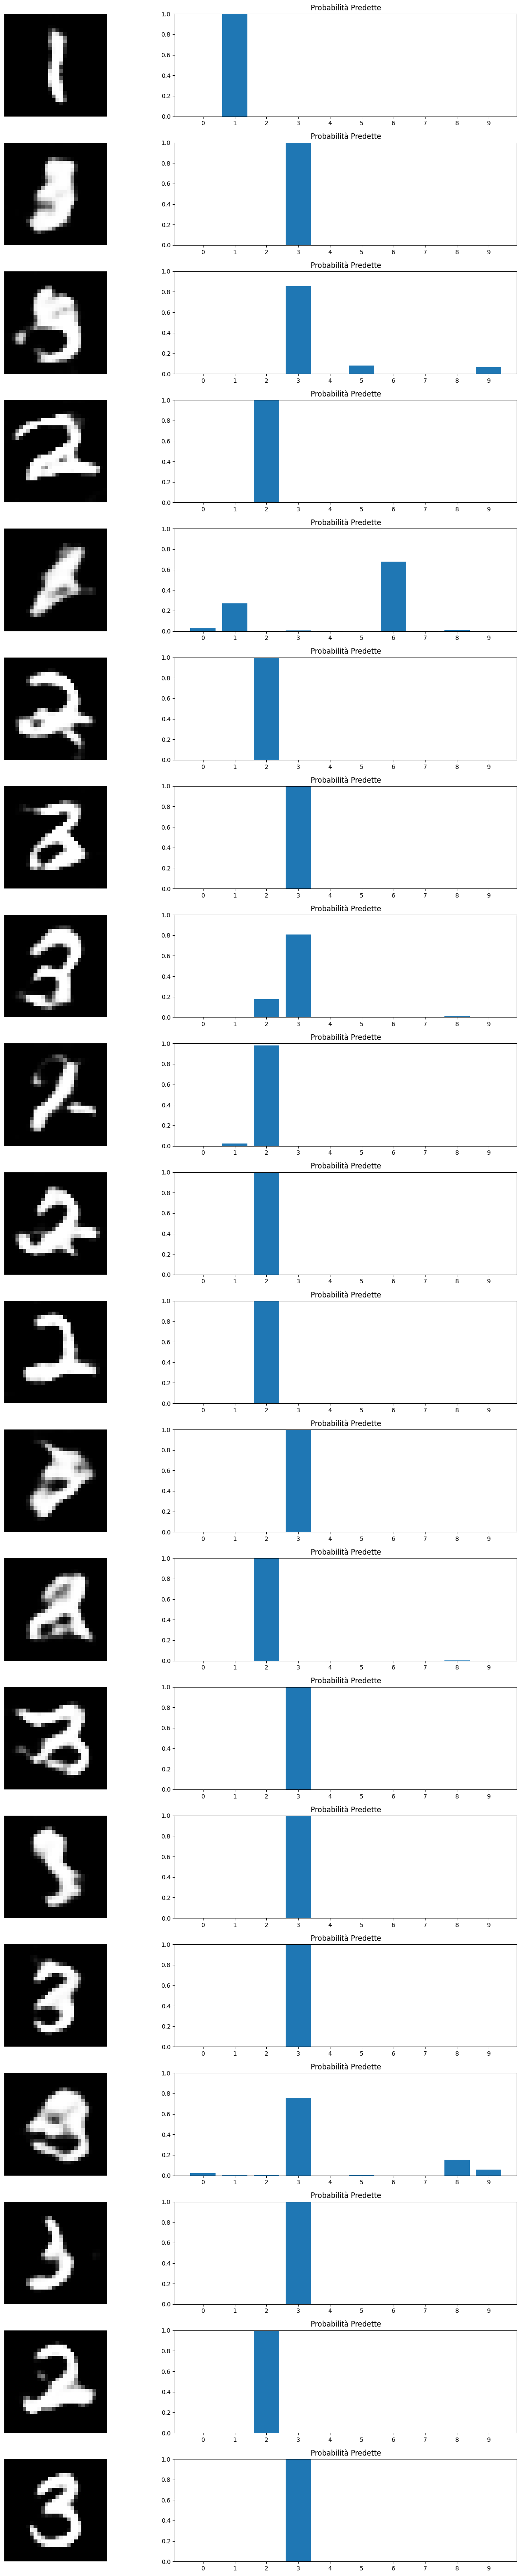

In [15]:
# Visualizza degli esempi di immagini generate durante l'allenamento con le relative probabilità predette dal classificatore pre-addestrato

def visualizza_immagini_generate_con_probabilita(generatore, classificatore, num_esempi=20):
    """
    Visualizza esempi di immagini generate con le relative probabilità predette.
    """
    rumore = tf.random.normal([num_esempi, LATENT_DIM])
    immagini_generate = generatore(rumore, training=False).numpy()

    plt.figure(figsize=(15, 3*num_esempi))
    for i in range(num_esempi):
        plt.subplot(num_esempi, 2, 2*i+1)
        plt.imshow(immagini_generate[i, :, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')

        plt.subplot(num_esempi, 2, 2*i+2)
        probs = classificatore.predict(immagini_generate[i].reshape(1, 28, 28, 1))[0]
        plt.bar(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], probs)
        plt.title("Probabilità Predette")
        plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Visualizza esempi di immagini generate
visualizza_immagini_generate_con_probabilita(generatore, classificatore = MNIST_classifier)

In [16]:
from google.colab import files

# Zip the folder
!zip -r /content/immagini_generate.zip /content/immagini_generate

# Download the zip file
files.download('/content/immagini_generate.zip')

# Zip the folder
!zip -r /content/immagini_casuali.zip /content/immagini_casuali

# Download the zip file
files.download('/content/immagini_casuali.zip')

# Zip the folder
!zip -r /content/sample_data.zip /content/sample_data

# Download the zip file
files.download('/content/sample_data.zip')

  adding: content/immagini_generate/ (stored 0%)
  adding: content/immagini_generate/epoca_093.png (deflated 11%)
  adding: content/immagini_generate/epoca_012.png (deflated 9%)
  adding: content/immagini_generate/epoca_073.png (deflated 10%)
  adding: content/immagini_generate/epoca_016.png (deflated 9%)
  adding: content/immagini_generate/epoca_071.png (deflated 10%)
  adding: content/immagini_generate/epoca_056.png (deflated 8%)
  adding: content/immagini_generate/epoca_097.png (deflated 10%)
  adding: content/immagini_generate/epoca_054.png (deflated 10%)
  adding: content/immagini_generate/epoca_022.png (deflated 10%)
  adding: content/immagini_generate/epoca_030.png (deflated 10%)
  adding: content/immagini_generate/epoca_077.png (deflated 10%)
  adding: content/immagini_generate/epoca_003.png (deflated 4%)
  adding: content/immagini_generate/epoca_042.png (deflated 10%)
  adding: content/immagini_generate/epoca_083.png (deflated 10%)
  adding: content/immagini_generate/epoca_037

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/immagini_casuali/ (stored 0%)
  adding: content/immagini_casuali/epoca_093.png (deflated 10%)
  adding: content/immagini_casuali/epoca_012.png (deflated 9%)
  adding: content/immagini_casuali/epoca_073.png (deflated 9%)
  adding: content/immagini_casuali/epoca_016.png (deflated 8%)
  adding: content/immagini_casuali/epoca_071.png (deflated 10%)
  adding: content/immagini_casuali/epoca_056.png (deflated 8%)
  adding: content/immagini_casuali/epoca_097.png (deflated 10%)
  adding: content/immagini_casuali/epoca_054.png (deflated 9%)
  adding: content/immagini_casuali/epoca_022.png (deflated 10%)
  adding: content/immagini_casuali/epoca_030.png (deflated 9%)
  adding: content/immagini_casuali/epoca_077.png (deflated 9%)
  adding: content/immagini_casuali/epoca_003.png (deflated 4%)
  adding: content/immagini_casuali/epoca_042.png (deflated 10%)
  adding: content/immagini_casuali/epoca_083.png (deflated 9%)
  adding: content/immagini_casuali/epoca_037.png (deflated 12%)
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Salva il modello del generatore
generatore.save('generatore_gan.h5')